# Airline Passenger Satisfaction

## Importing libraries

In [72]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer

# Formating to hide code

In [26]:
# Acknowledments to https://github.com/AxZxP

from IPython.display import HTML
import random
def hide_toggle(for_next=False):
    this_cell = """$('div.cell.code_cell.rendered.selected')"""
    next_cell = this_cell + '.next()'
    toggle_text = 'Show/hide code'  
    target_cell = this_cell  
    js_hide_current = ''
    if for_next:
        target_cell = next_cell
        toggle_text += ' next cell'
        js_hide_current = this_cell + '.find("div.input").hide();'
    js_f_name = 'code_toggle_{}'.format(str(random.randint(1,2**64)))
    html = """
        <script>
            function {f_name}() {{
                {cell_selector}.find('div.input').toggle();
            }}
            {js_hide_current}
        </script>
        <a href="javascript:{f_name}()">{toggle_text}</a>
    """.format(
        f_name=js_f_name,
        cell_selector=target_cell,
        js_hide_current=js_hide_current, 
        toggle_text=toggle_text
    )
    return HTML(html)

hide_toggle()

## Importing data

In [2]:
airline = pd.read_csv("data/airline-train.csv")

## Understanding the data

In [3]:
airline.shape

(103904, 25)

In [4]:
airline.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
airline.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [6]:
airline.nunique()

Unnamed: 0                           103904
id                                   103904
Gender                                    2
Customer Type                             2
Age                                      75
Type of Travel                            2
Class                                     3
Flight Distance                        3802
Inflight wifi service                     6
Departure/Arrival time convenient         6
Ease of Online booking                    6
Gate location                             6
Food and drink                            6
Online boarding                           6
Seat comfort                              6
Inflight entertainment                    6
On-board service                          6
Leg room service                          6
Baggage handling                          5
Checkin service                           6
Inflight service                          6
Cleanliness                               6
Departure Delay in Minutes      

In [28]:
# Checking if there's any duplicate row
airline[airline.duplicated()]

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Satisfied
id,,,,,,,,,,,,,,,,,,,,,


## Data cleaning

In [7]:
# Droping column "Unnamed: 0" because it doesn't increment in my analysis:
airline.drop(columns="Unnamed: 0", inplace=True)

# Reseting index for "id" since these values are unique for each row:
airline.set_index("id", inplace=True)

# Gender : 1 for Female and 0 for Male
airline.Gender = airline.Gender.apply(lambda x: 1 if x=="Female" else 0)

airline.head(7)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied


In [8]:
airline.sort_values(by="id",inplace=True)
airline

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,Loyal Customer,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,Female,Loyal Customer,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,Male,Loyal Customer,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [9]:
airline["Customer Type"].unique()

array(['disloyal Customer', 'Loyal Customer'], dtype=object)

In [10]:
# Cleaning column "Customer Type" to indicate only if customer is loyal or not
airline.rename(columns={"Customer Type":"Loyal"}, inplace=True)
airline["Loyal"] = airline["Loyal"].apply(lambda x: 1 if x=='Loyal Customer' else 0)
airline

,Gender,Loyal,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
id,,,,,,,,,,,,,,,,,,,,,
1,Male,0,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
2,Female,1,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
3,Male,1,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
4,Male,1,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
5,Female,1,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,1,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,neutral or dissatisfied
129875,Female,1,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,neutral or dissatisfied
129878,Male,1,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,neutral or dissatisfied


In [11]:
# Cleaning column "Satisfaction" to indicate only if customer was satisfied or not
airline.rename(columns={"satisfaction":"Satisfied"}, inplace=True)
airline["Satisfied"] = airline["Satisfied"].apply(lambda x: 1 if x=='satisfied' else 0)
airline

,Gender,Loyal,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfied
id,,,,,,,,,,,,,,,,,,,,,
1,Male,0,48,Business travel,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
2,Female,1,35,Business travel,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
3,Male,1,41,Business travel,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
4,Male,1,50,Business travel,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
5,Female,1,49,Business travel,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,1,28,Personal Travel,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,0
129875,Female,1,55,Personal Travel,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,0
129878,Male,1,42,Personal Travel,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,0


In [12]:
# Cleaning column "Satisfaction" to indicate only if customer was satisfied or not
airline.rename(columns={'Type of Travel':"Business Travel"}, inplace=True)
airline["Business Travel"] = airline["Business Travel"].apply(lambda x: 1 if x=='Business travel' else 0)
airline

,Gender,Loyal,Age,Business Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Satisfied
id,,,,,,,,,,,,,,,,,,,,,
1,Male,0,48,1,Business,821,3,3,3,3,...,5,3,2,5,4,5,5,2,5.0,0
2,Female,1,35,1,Business,821,2,2,2,2,...,5,5,5,5,3,5,5,26,39.0,1
3,Male,1,41,1,Business,853,4,4,4,4,...,3,3,3,3,4,3,5,0,0.0,1
4,Male,1,50,1,Business,1905,2,2,2,2,...,5,5,5,5,3,5,4,0,0.0,1
5,Female,1,49,1,Business,3470,3,3,3,3,...,3,3,4,3,3,3,5,0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129874,Female,1,28,0,Eco Plus,337,4,2,4,4,...,3,1,5,3,4,4,3,0,0.0,0
129875,Female,1,55,0,Eco Plus,308,3,4,3,4,...,4,4,3,4,4,4,4,0,0.0,0
129878,Male,1,42,0,Eco Plus,337,2,5,2,1,...,3,3,4,5,4,4,3,6,14.0,0


In [13]:
# The last categorical variable that we have Class
airline.Class.unique()

array(['Business', 'Eco', 'Eco Plus'], dtype=object)

In [14]:
airline.isna().sum()

Gender                                 0
Loyal                                  0
Age                                    0
Business Travel                        0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
Satisfied                              0
dtype: int64

There's one column with missing values.

However, before conducting some more intrusive cleaning, let's do some other analysis.

The job of dealing with these missing data might be simplified later by other criterias.

# Basic Data Visualizations for further understanding

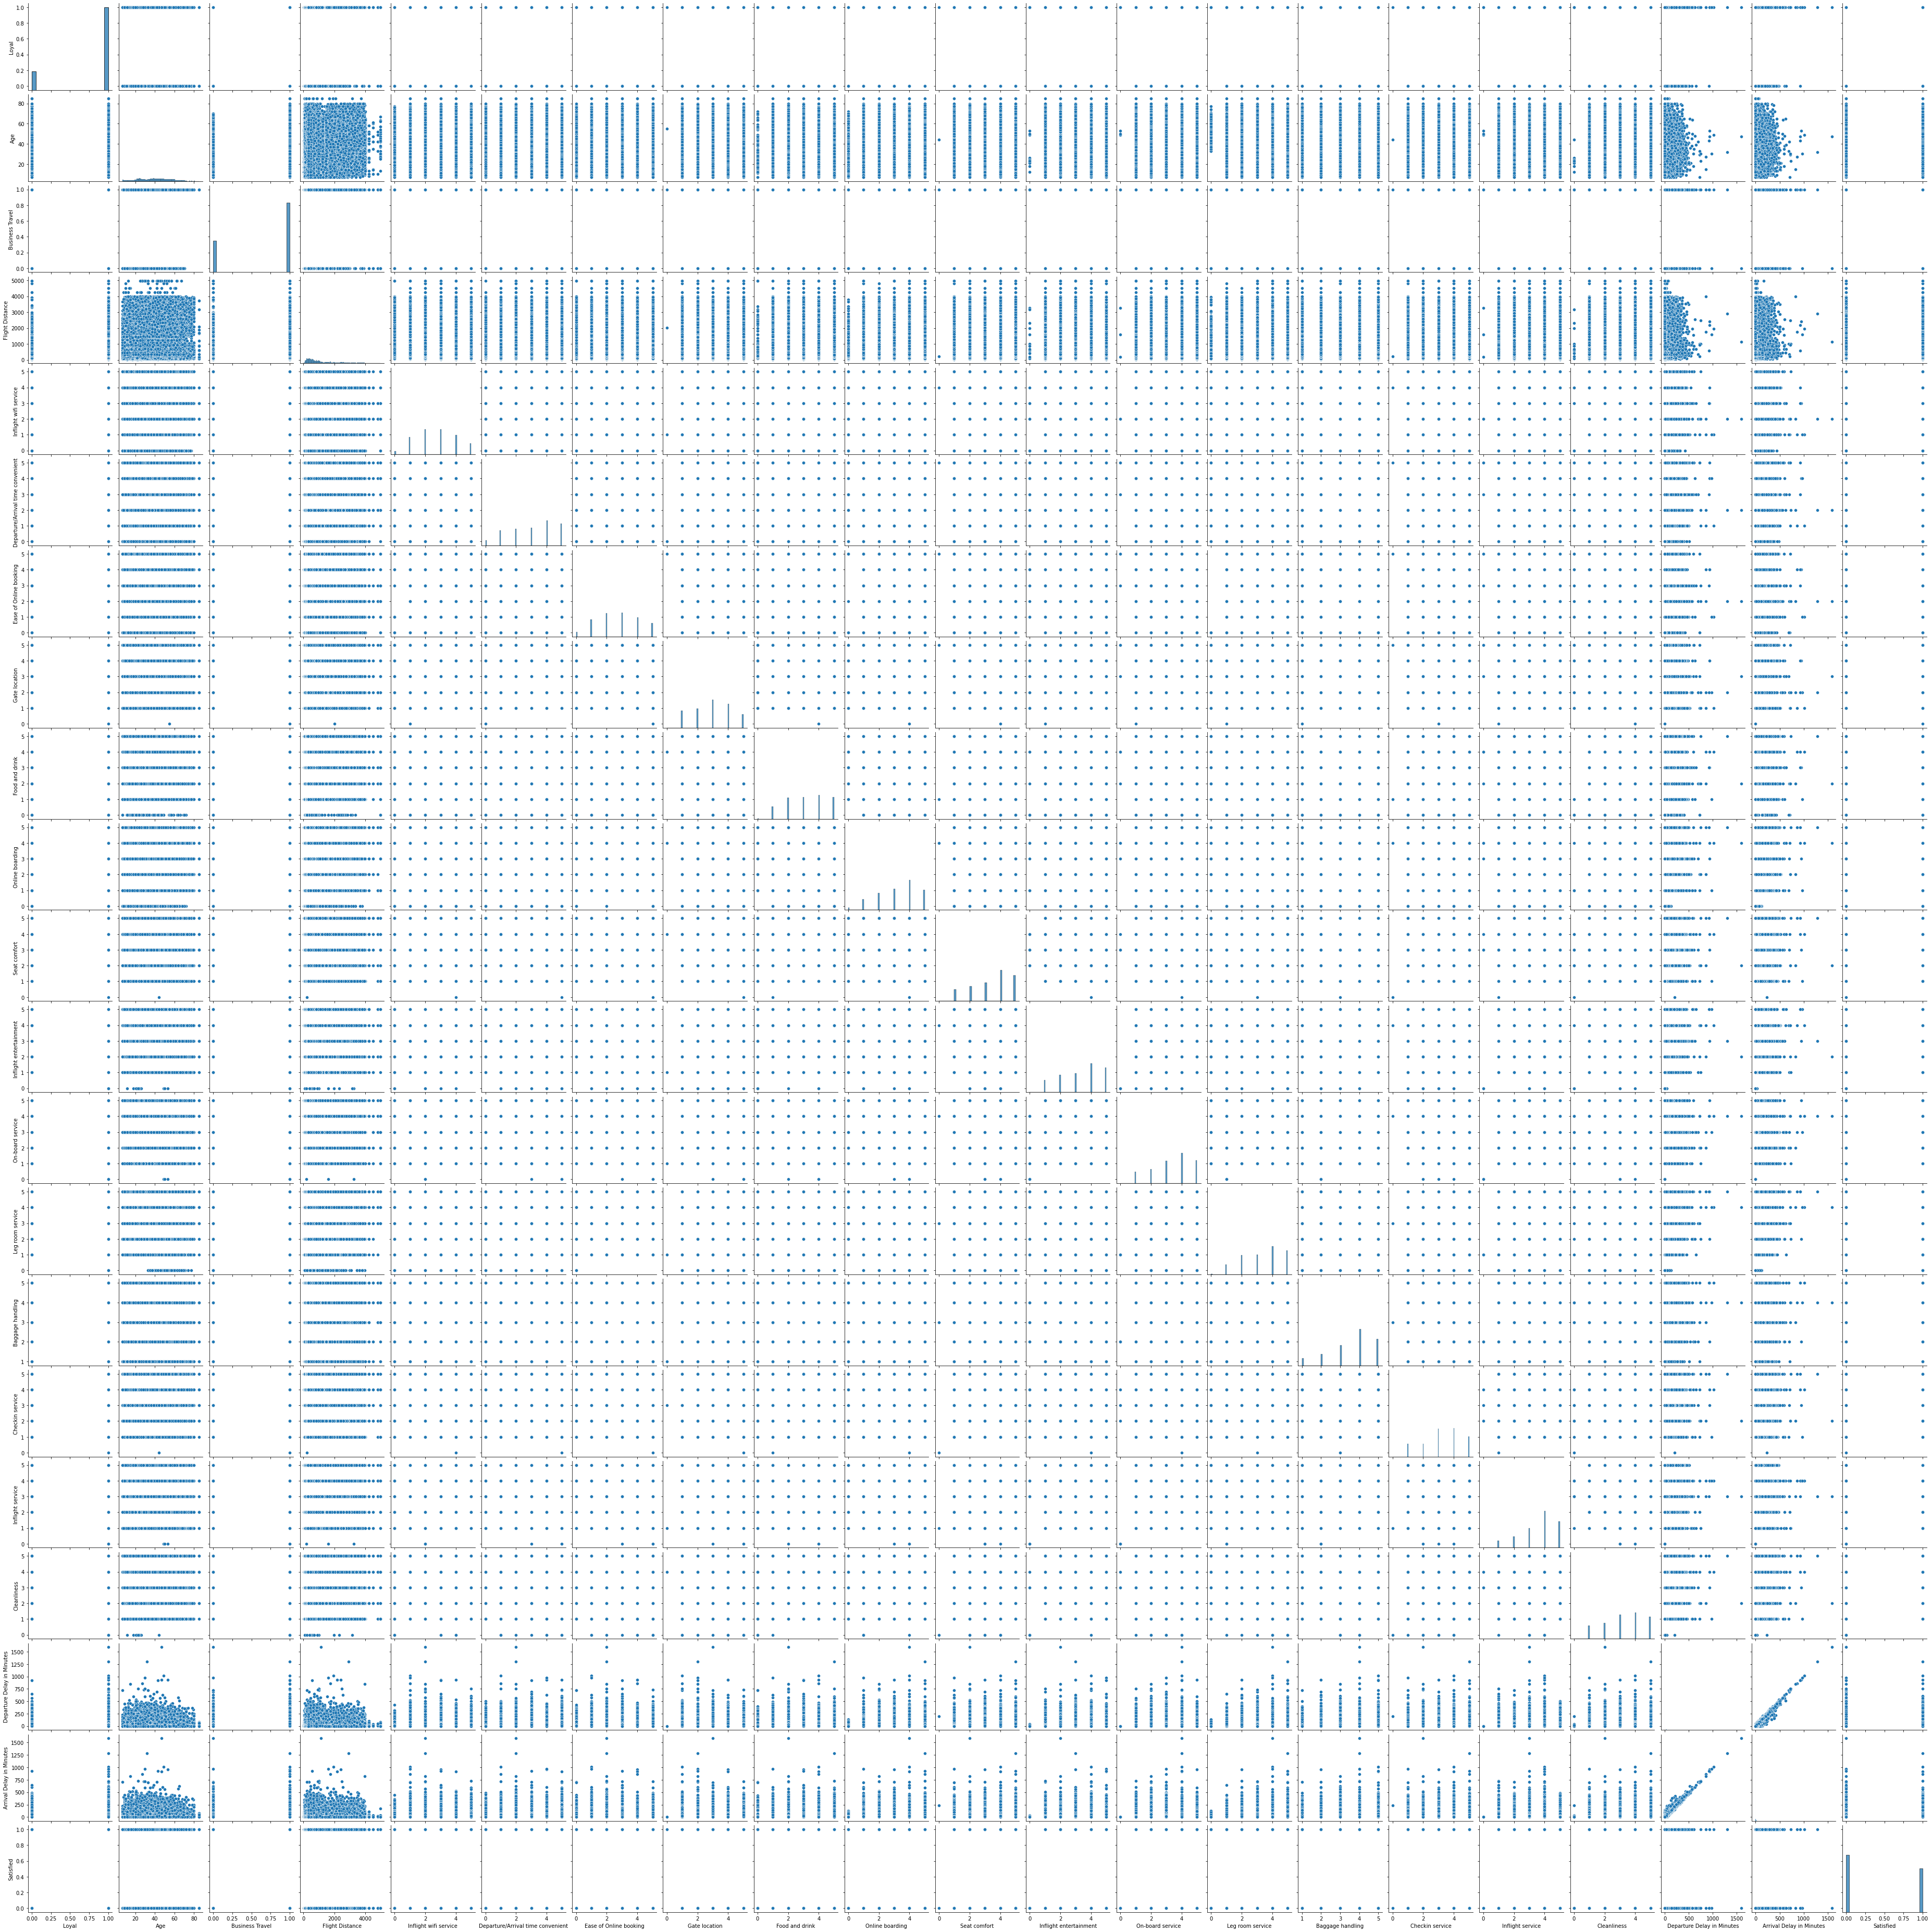

In [15]:
# Having a rough image of how numeric data are related in pairs
sns.pairplot(airline)

<AxesSubplot:>

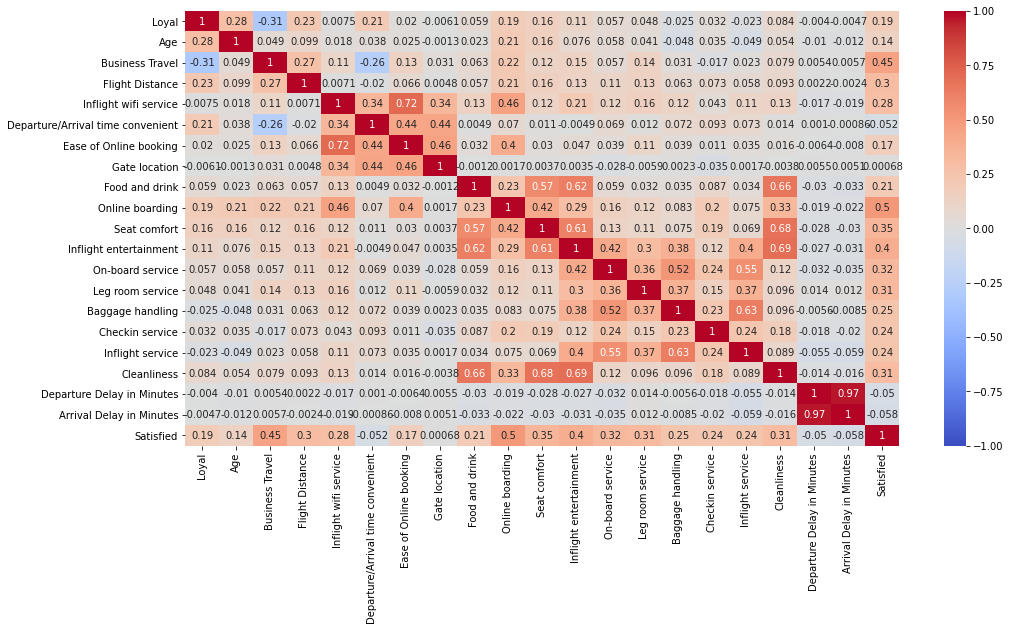

In [16]:
# Making a heatmap for the numeric data to understand how they correlate in pairs
plt.figure(figsize=(16,8))
sns.heatmap(airline.corr(),annot=True,cmap="coolwarm", vmin=-1)

As we can verify, there's only two columns that are very correlated with one another: `Departure Delay in Minutes` and `Arrival Delay in Minutes`, with more than 90% of correlation. **This will probably lead to multicollinearity problems.**

Therefore, it may be interesting to drop one of these columns in order to have the best prediction as possible.

I will choose to drop `Arrival Delay in Minutes` because of 2 reasons:
1. **It has 310 missing values** (opposed to `Departure Delay in Minutes` that has 0 `NaN` values)
2. **Hypothesis**: `Departure Delay in Minutes` cause more anxiety and stress because the delay is still unknown. Once the flight departs with delays, the customers had already the time to prevent other people that he is delayed and he has the whole flight duration to calm themselves and deal with the delay when arriving.

<AxesSubplot:>

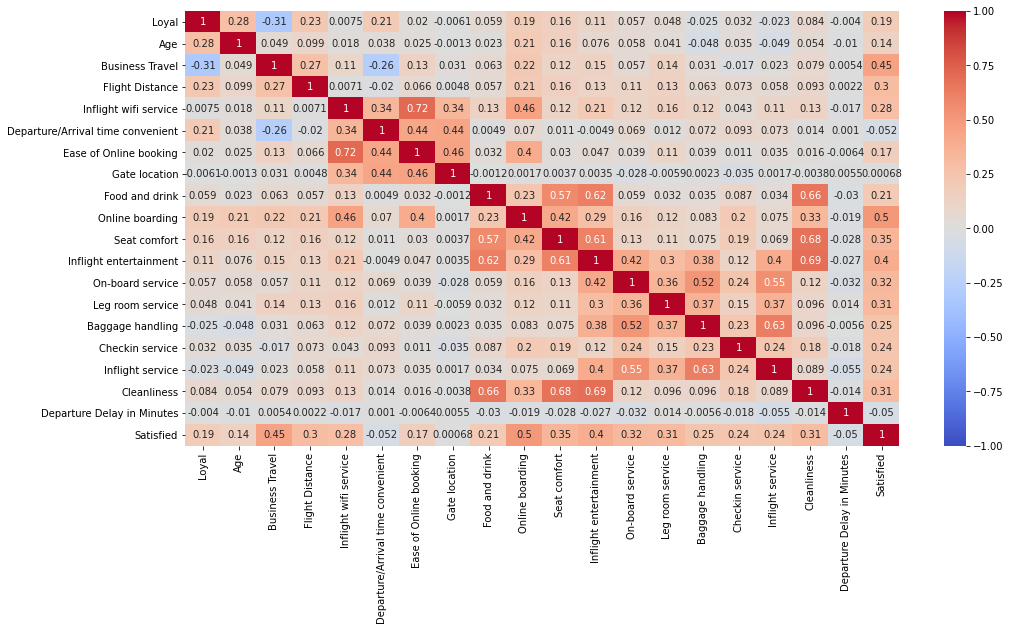

In [17]:
# Droping column "Arrival Delay in Minutes"
airline.drop(columns="Arrival Delay in Minutes", inplace=True)

# Printing the heatmap once again to verify that the multicollinearity problem
plt.figure(figsize=(16,8))
sns.heatmap(airline.corr(),annot=True,cmap="coolwarm", vmin=-1)

## Visualizing some more

Text(0.5, 1.0, 'Histogram of Ages')

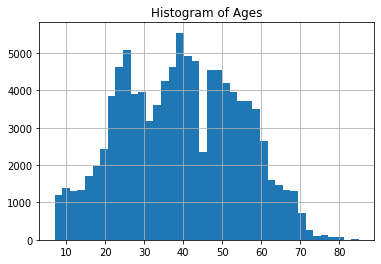

In [43]:
airline.Age.hist(bins=40)
plt.title("Histogram of Ages")

Text(0.5, 1.0, 'Histogram of Flight Distance')

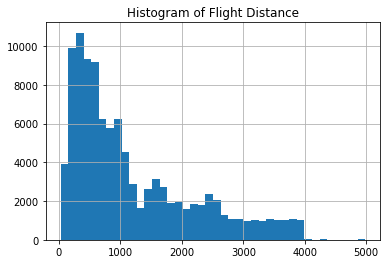

In [42]:
# Checking the distribution of Flight distance
airline["Flight Distance"].hist(bins=40)
plt.title("Histogram of Flight Distance")

The "Flight Distance" has a skewed distribution and may be needed to normalize in order to better work for the model.

MAXIMUM 'Flight Distance': 4983
MINIMUM 'Flight Distance': 31


{'whiskers': [<matplotlib.lines.Line2D at 0x12b825760>,
 'caps': [<matplotlib.lines.Line2D at 0x12b825e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x12b7ba400>],
 'medians': [<matplotlib.lines.Line2D at 0x12b8364f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12b836820>],
 'means': []}

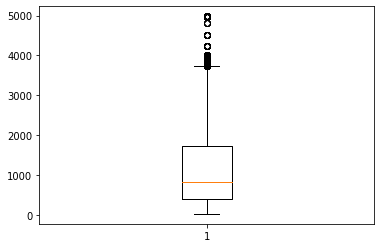

In [41]:
# Cheking outliers in "Flight Distance"
print("MAXIMUM 'Flight Distance':",airline["Flight Distance"].max())
print("MINIMUM 'Flight Distance':",airline["Flight Distance"].min())
plt.boxplot(airline["Flight Distance"],)

It seems that `"Flight Distance"` has also a lot of high ouliers. This should be corrected later.

MAXIMUM 'Departure Delay in Minutes': 1592
MINIMUM 'Departure Delay in Minutes': 0
58668


Text(0.5, 1.0, 'Histogram of Departure Delay in Minutes')

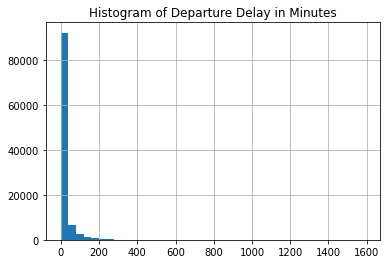

In [44]:
# Analyzing the 'Departure Delay in Minutes'
print("MAXIMUM 'Departure Delay in Minutes':",airline["Departure Delay in Minutes"].max())
print("MINIMUM 'Departure Delay in Minutes':",airline["Departure Delay in Minutes"].min())
print(airline["Departure Delay in Minutes"].value_counts().max())
airline["Departure Delay in Minutes"].hist(bins=40)
plt.title("Histogram of Departure Delay in Minutes")

This `Departure Delay in Minutes` distribution is the most skewed one, therefore it should be normalized.

MAXIMUM 'Departure Delay in Minutes': 1592
MINIMUM 'Departure Delay in Minutes': 0


{'whiskers': [<matplotlib.lines.Line2D at 0x12c194040>,
 'caps': [<matplotlib.lines.Line2D at 0x12c194700>,
 'boxes': [<matplotlib.lines.Line2D at 0x12ba1f850>],
 'medians': [<matplotlib.lines.Line2D at 0x12c194dc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12c19f160>],
 'means': []}

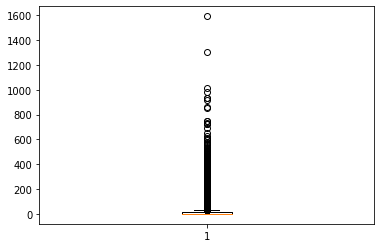

In [50]:
# Cheking outliers in "Departure Delay in Minutes"
print("MAXIMUM 'Departure Delay in Minutes':", airline["Departure Delay in Minutes"].max())
print("MINIMUM 'Departure Delay in Minutes':", airline["Departure Delay in Minutes"].min())
plt.boxplot(airline["Departure Delay in Minutes"])

<AxesSubplot:>

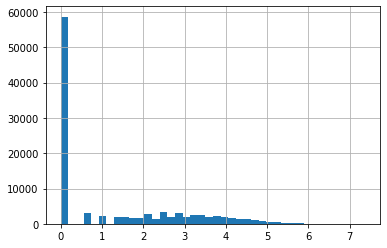

In [67]:
np.log(airline["Departure Delay in Minutes"]+1).hist(bins=40)

## Testing: Standardizing and Scaling Variables

In [113]:
airline["Departure Delay in Minutes"].value_counts().sort_values(ascending=False)

0      58668
1       2948
2       2274
3       2009
4       1854
       ...  
444        1
329        1
579        1
314        1
447        1
Name: Departure Delay in Minutes, Length: 446, dtype: int64

In [148]:
# Analyzing the two previous variables normalized
from mlxtend.preprocessing import standardize

X = airline["Departure Delay in Minutes"]

Y = pd.DataFrame(standardize.fit_transform(X))

print(Y.min())
print(Y.mean())
print(Y.max())
Y.sort_values(0)

AttributeError: 'function' object has no attribute 'fit_transform'

0.18415924219311006
1.0


<AxesSubplot:>

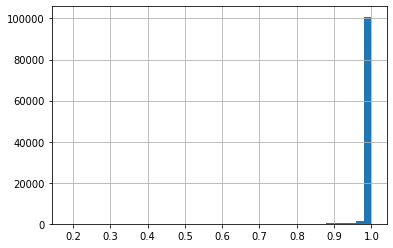

In [84]:
print(normalized['Flight Distance'].min())
print(normalized['Flight Distance'].max())
normalized['Flight Distance'].hist(bins=40)

0.0
0.9828964205422968


<AxesSubplot:>

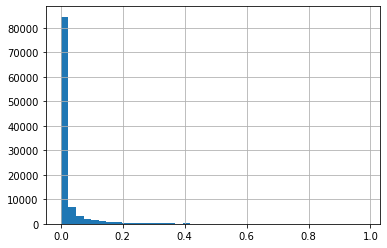

In [85]:
print(normalized['Departure Delay in Minutes'].min())
print(normalized['Departure Delay in Minutes'].max())
normalized['Departure Delay in Minutes'].hist(bins=40)

In [62]:
# Analyzing the two previous variables scaled by MinMaxScaler
min_max_scaler = MinMaxScaler()
FD_DDM = airline[['Flight Distance',"Departure Delay in Minutes"]].copy()
FD_DDM_scaled = pd.DataFrame( min_max_scaler.fit_transform(FD_DDM), columns=("Flight Distance","Departure Delay in Minutes") )
FD_DDM_scaled

,Flight Distance,Departure Delay in Minutes
0,0.159532,0.001256
1,0.159532,0.016332
2,0.165994,0.000000
3,0.378433,0.000000
4,0.694467,0.000000
...,...,...
103899,0.061793,0.000000
103900,0.055937,0.000000
103901,0.061793,0.003769
103902,0.061793,0.019472


<AxesSubplot:>

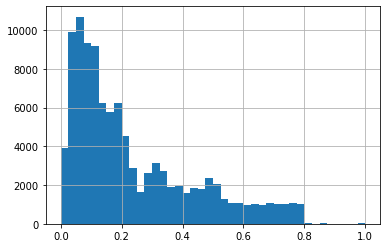

In [64]:
# Plotting histogram for new "Flight Distance"
FD_DDM_scaled["Flight Distance"].hist(bins=40)

# Standardizing the values of our dataset

# Compiling all cleaning and standardizing methods in a function, in order to use for the `TEST` dataset next

# Model Creation

In [ ]:
X_airline_train = 

In [ ]:
y_airline_train = 

# Predictions

Finally, we may use our `TEST` dataset, in order to predict the customer satisfaction based on the client's usage of the service.

In [19]:
airline_test = pd.read_csv("data/airline-test.csv")
print(airline_test.shape)
airline_test.head(5)

(25976, 25)


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


Cleaning the dataset:

Standardizing the dataset: